# SIMPLE CHATBOT USING NAIVE BAYES

***Naive Bayes:*** https://drive.google.com/file/d/1FqreIS0683a9wXVdE7Olx2R69qGA6aqO/view

***Dataset:*** https://drive.google.com/uc?id=1LLtO0o2l-WhmivswfV5QB6fWKs71u3ba&export=download

In [1]:
import numpy as np
import pandas as pd
import json
import re
import urllib.request
import random
from matplotlib import pyplot as plt

In [2]:
FILE_PATH = './tuyensinh.json'
with open(FILE_PATH, 'r') as file:
    data = json.load(file)
data

{'intents': [{'tag': 'chào',
   'patterns': ['hi',
    'chào',
    'hello',
    'xin chào',
    'chào bạn',
    'hey',
    'ey',
    'ê'],
   'responses': ['Xin chào! Bạn có thắc mắc gì về thông tin tuyển sinh?']},
  {'tag': 'tạm biệt',
   'patterns': ['ok',
    'bye',
    'goodbye',
    'tạm biệt',
    'au revoir',
    'à bientot',
    'bye bye',
    'bai bai'],
   'responses': ['Goodbye! Hẹn gặp lại bạn!']},
  {'tag': 'chỉ tiêu',
   'patterns': ['Chỉ tiêu sinh viên',
    'chỉ tiêu tuyển sinh',
    'sinh viên dự kiến',
    'chỉ tiêu dự kiến',
    'số sinh viên dự kiến',
    'tuyển bao nhiêu sinh viên',
    'chỉ tiêu số sinh viên là bao nhiêu',
    'dự kiến lấy bao nhiêu sinh viên'],
   'responses': ['Tổng chỉ tiêu tuyển sinh dự kiến là 7,985 sinh viên.']},
  {'tag': 'xét tuyển tài năng',
   'patterns': ['Các phương thức xét tuyển tài năng',
    'Phương thức xét tuyển tài năng là gì?',
    'Xét tuyển tài năng như thế nào?',
    'thời gian xét tuyển tài năng?',
    'khi nào đăng kí xét 

In [3]:
def preprocess(text: str):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  words = text.split()
  return words


In [5]:
corpus = []
for intent in data['intents']:
  patterns = intent['patterns']
  for pattern in patterns:
    words = preprocess(pattern)
    corpus.append(words)
for text in corpus:
  print(text)

['hi']
['chào']
['hello']
['xin', 'chào']
['chào', 'bạn']
['hey']
['ey']
['ê']
['ok']
['bye']
['goodbye']
['tạm', 'biệt']
['au', 'revoir']
['à', 'bientot']
['bye', 'bye']
['bai', 'bai']
['chỉ', 'tiêu', 'sinh', 'viên']
['chỉ', 'tiêu', 'tuyển', 'sinh']
['sinh', 'viên', 'dự', 'kiến']
['chỉ', 'tiêu', 'dự', 'kiến']
['số', 'sinh', 'viên', 'dự', 'kiến']
['tuyển', 'bao', 'nhiêu', 'sinh', 'viên']
['chỉ', 'tiêu', 'số', 'sinh', 'viên', 'là', 'bao', 'nhiêu']
['dự', 'kiến', 'lấy', 'bao', 'nhiêu', 'sinh', 'viên']
['các', 'phương', 'thức', 'xét', 'tuyển', 'tài', 'năng']
['phương', 'thức', 'xét', 'tuyển', 'tài', 'năng', 'là', 'gì']
['xét', 'tuyển', 'tài', 'năng', 'như', 'thế', 'nào']
['thời', 'gian', 'xét', 'tuyển', 'tài', 'năng']
['khi', 'nào', 'đăng', 'kí', 'xét', 'tuyển', 'tài', 'năng']
['cách', 'đăng', 'ký', 'xét', 'tuyển', 'tài', 'năng']
['đăng', 'ký', 'xét', 'tuyển', 'tài', 'năng', 'như', 'thế', 'nào']
['thời', 'gian', 'đăng', 'ký', 'xét', 'tuyển', 'tài', 'năng']
['các', 'phương', 'thức', 'tuyển

In [8]:
vocab = set()
print('Tap cac tu khoa: ')
for document in corpus:
  vocab.update(document)
vocab = sorted(vocab)
print(vocab)

Tap cac tu khoa: 
['1', '2', '2022', '2023', 'anh', 'au', 'bai', 'bao', 'bientot', 'biết', 'biệt', 'bk', 'bye', 'bài', 'bách', 'bạ', 'bạn', 'bản', 'bằng', 'bị', 'cao', 'chi', 'chia', 'cho', 'chuẩn', 'chào', 'chí', 'chưpng', 'chương', 'chất', 'chỉ', 'chức', 'chứng', 'cntt', 'cung', 'các', 'cách', 'cái', 'cình', 'có', 'công', 'cơ', 'cường', 'cấp', 'cấu', 'cần', 'cầu', 'của', 'cứu', 'danh', 'diện', 'duy', 'dào', 'dáp', 'dăng', 'dạy', 'dục', 'dụng', 'dự', 'dựa', 'ey', 'gian', 'giá', 'giáo', 'giảng', 'giớ', 'giới', 'giờ', 'goodbye', 'gì', 'gồm', 'hello', 'heo', 'hey', 'hi', 'hiểu', 'hoạch', 'hà', 'hình', 'hóa', 'hệ', 'học', 'hồ', 'hỗ', 'hội', 'hợp', 'ielts', 'khi', 'khoa', 'khác', 'không', 'kiến', 'kiểu', 'kiện', 'kê', 'kí', 'ký', 'kế', 'liên', 'liệt', 'là', 'làm', 'lâu', 'lòng', 'lĩnh', 'lượng', 'lại', 'lấy', 'lợi', 'muốn', 'mà', 'mã', 'môn', 'mấy', 'mốc', 'một', 'mở', 'mục', 'mức', 'ncs', 'ngeehj', 'nghiên', 'nghiệp', 'nghề', 'nghệ', 'ngoái', 'ngoại', 'ngành', 'ngữ', 'nhiêu', 'nhà', 'như'

In [6]:
intent_counts = {}
total_documents = 0

for intent in data['intents']:
  intent_tag = intent['tag']
  patterns = intent['patterns']
  count = len(patterns)
  intent_counts[intent_tag] = count
  total_documents += count

prior_probabilities = {}
for intent_tag, count in intent_counts.items():
  prior_probabilities[intent_tag] = count / total_documents

for intent_tag, prior_probability in prior_probabilities.items():
  print(f"Prior Probability for '{intent_tag}': {prior_probability}")

Prior Probability for 'chào': 0.023952095808383235
Prior Probability for 'tạm biệt': 0.023952095808383235
Prior Probability for 'chỉ tiêu': 0.023952095808383235
Prior Probability for 'xét tuyển tài năng': 0.023952095808383235
Prior Probability for 'phương thức': 0.023952095808383235
Prior Probability for 'tuyển thẳng': 0.023952095808383235
Prior Probability for 'chứng chỉ quốc tế': 0.023952095808383235
Prior Probability for 'học bạ': 0.020958083832335328
Prior Probability for 'đánh giá tư duy': 0.017964071856287425
Prior Probability for 'điểm thi': 0.023952095808383235
Prior Probability for 'chương trình': 0.020958083832335328
Prior Probability for 'chương trình chuẩn': 0.023952095808383235
Prior Probability for 'chất lượng cao': 0.023952095808383235
Prior Probability for 'chương trình tiếng anh': 0.023952095808383235
Prior Probability for 'ngôn ngữ khác': 0.023952095808383235
Prior Probability for 'tiếng nhật': 0.023952095808383235
Prior Probability for 'PFIEV': 0.023952095808383235
P

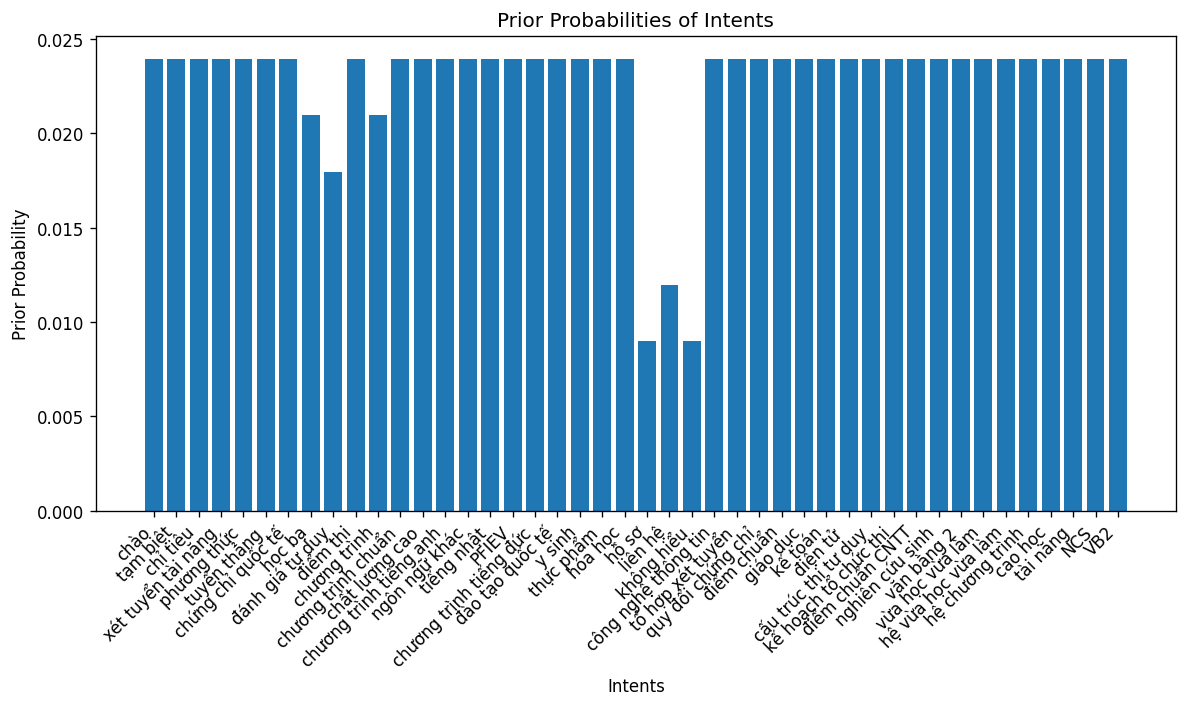

In [7]:
intents = list(prior_probabilities.keys())
probabilities = list(prior_probabilities.values())
plt.figure(figsize=(10, 6), dpi = 120)
plt.bar(intents, probabilities)
plt.xlabel('Intents')
plt.ylabel('Prior Probability')
plt.title('Prior Probabilities of Intents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
from collections import defaultdict

tag_counts = defaultdict(int)
# Count number of texts in each tag
for intent in data['intents']:
  tag = intent['tag']
  patterns = intent['patterns']
  tag_counts[tag] += len(patterns)

keyword_frequencies = defaultdict(lambda: defaultdict(int))
# Count number of occurrences of each keyword in each tag
for intent in data['intents']:
  tag = intent['tag']
  patterns = intent['patterns']
  for pattern in patterns:
    words = preprocess(pattern)
    for word in words:
      if word in vocab:
        keyword_frequencies[tag][word] += 1

for tag, frequencies in keyword_frequencies.items():
  print(f"Keyword Frequencies for '{tag}':")
  for keyword, frequency in frequencies.items():
    print(f"{keyword}: {frequency}")
  print()

Keyword Frequencies for 'chào':
hi: 1
chào: 3
hello: 1
xin: 1
bạn: 1
hey: 1
ey: 1
ê: 1

Keyword Frequencies for 'tạm biệt':
ok: 1
bye: 3
goodbye: 1
tạm: 1
biệt: 1
au: 1
revoir: 1
à: 1
bientot: 1
bai: 2

Keyword Frequencies for 'chỉ tiêu':
chỉ: 4
tiêu: 4
sinh: 7
viên: 6
tuyển: 2
dự: 4
kiến: 4
số: 2
bao: 3
nhiêu: 3
là: 1
lấy: 1

Keyword Frequencies for 'xét tuyển tài năng':
các: 1
phương: 2
thức: 2
xét: 8
tuyển: 8
tài: 8
năng: 8
là: 1
gì: 1
như: 2
thế: 2
nào: 3
thời: 2
gian: 2
khi: 1
đăng: 4
kí: 1
cách: 1
ký: 3

Keyword Frequencies for 'phương thức':
các: 2
phương: 7
thức: 8
tuyển: 8
sinh: 8
nào: 4
theo: 1
có: 1
bao: 1
nhiêu: 1
là: 1
gì: 2
dựa: 1
trên: 1
cái: 1
nhà: 1
trường: 1
đưa: 1
ra: 1
cách: 1

Keyword Frequencies for 'tuyển thẳng':
xét: 4
tuyển: 8
thẳng: 8
như: 2
thế: 2
nào: 2
làm: 2
sao: 1
để: 2
muốn: 2
được: 2
thì: 1
cần: 1
gì: 2
sinh: 1
viên: 1
điều: 2
kiện: 2
là: 1
đối: 1
tượng: 1

Keyword Frequencies for 'chứng chỉ quốc tế':
xét: 8
tuyển: 8
theo: 6
chứng: 8
chỉ: 8
quốc: 8
tế: 

In [10]:
T = len(vocab)
keyword_probabilities = defaultdict(lambda: defaultdict(float))
for tag, keywords in keyword_frequencies.items():
  total_keywords = sum(keywords.values())
  print(f"Tag: {tag} - Tổng số từ khoá: {total_keywords}")
  for keyword in vocab:
    count = keywords[keyword]
    keyword_probabilities[tag][keyword] = (count + 1) / (total_keywords + T)


Tag: chào - Tổng số từ khoá: 10
Tag: tạm biệt - Tổng số từ khoá: 13
Tag: chỉ tiêu - Tổng số từ khoá: 41
Tag: xét tuyển tài năng - Tổng số từ khoá: 60
Tag: phương thức - Tổng số từ khoá: 52
Tag: tuyển thẳng - Tổng số từ khoá: 48
Tag: chứng chỉ quốc tế - Tổng số từ khoá: 79
Tag: học bạ - Tổng số từ khoá: 50
Tag: đánh giá tư duy - Tổng số từ khoá: 42
Tag: điểm thi - Tổng số từ khoá: 71
Tag: chương trình - Tổng số từ khoá: 68
Tag: chương trình chuẩn - Tổng số từ khoá: 53
Tag: chất lượng cao - Tổng số từ khoá: 63
Tag: chương trình tiếng anh - Tổng số từ khoá: 80
Tag: ngôn ngữ khác - Tổng số từ khoá: 94
Tag: tiếng nhật - Tổng số từ khoá: 84
Tag: PFIEV - Tổng số từ khoá: 47
Tag: chương trình tiếng đức - Tổng số từ khoá: 81
Tag: đào tạo quốc tế - Tổng số từ khoá: 76
Tag: y sinh - Tổng số từ khoá: 47
Tag: thực phẩm - Tổng số từ khoá: 46
Tag: hóa học - Tổng số từ khoá: 42
Tag: hồ sơ - Tổng số từ khoá: 15
Tag: liên hệ - Tổng số từ khoá: 16
Tag: không hiểu - Tổng số từ khoá: 10
Tag: công nghệ thôn

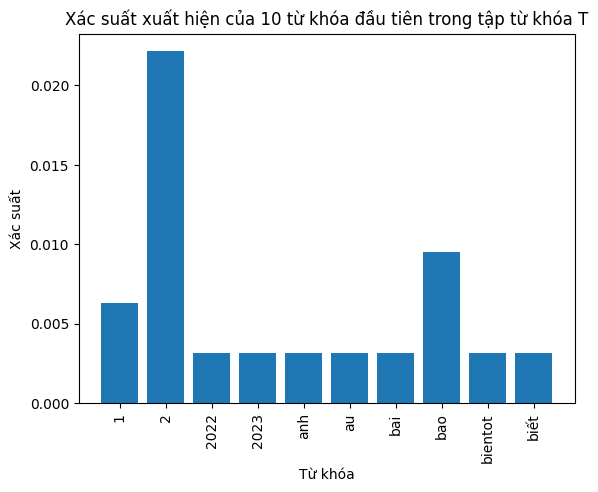

In [20]:

import matplotlib.pyplot as plt

# Sắp xếp từ khóa theo thứ tự alphabetic
sorted_keywords = sorted(keyword_probabilities[tag].items(), key=lambda x: x[0])

# Chọn 10 từ khóa
top_keywords = sorted_keywords[:10]

# Tách từ khóa và xác suất thành hai danh sách riêng
keywords = [keyword for keyword, probability in top_keywords]
probabilities = [probability for keyword, probability in top_keywords]

plt.bar(keywords, probabilities)
plt.xlabel('Từ khóa')
plt.ylabel('Xác suất')
plt.title('Xác suất xuất hiện của 10 từ khóa đầu tiên trong tập từ khóa T')
plt.xticks(rotation=90)
plt.show()

In [21]:
def classify_text(input_document):
  document = input_document.lower()
  document = re.sub(r'[^\w\s]', '', document)
  words = document.split()

  posterior_probabilities = {}
  for tag in tag_counts.keys():
    posterior_probability = prior_probabilities[tag]
    for word in words:
      if word in vocab:
        posterior_probability *= keyword_probabilities[tag][word]
    posterior_probabilities[tag] = posterior_probability

  classified_tag = None
  highest_probability = -1
  for tag, probability in posterior_probabilities.items():
    if probability > highest_probability:
      highest_probability = probability
      classified_tag = tag
  return classified_tag, posterior_probabilities

In [22]:
plt.ion()

def plot_classification_results(classified_tag, posterior_probabilities):
  intents = []
  probabilities = []
  for intent, probability in posterior_probabilities.items():
    intents.append(intent)
    probabilities.append(probability)

  plt.clf()

  figure = plt.figure(figsize = (10, 6), dpi = 120)
  plt.bar(intents, probabilities)
  plt.xlabel('Intents')
  plt.ylabel('Posterior Probability')
  plt.title('Posterior Probabilities of Intents')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.pause(0.01)
  plt.show()


Nhập văn bản (hoặc nhập 'exit' để thoát): thi
Văn bản được phân loại vào lớp tag: kế hoạch tổ chức thi
44
Bot tuyển sinh: (3) Hình thức thi: Thi trắc nghiệm khách quan trong khung thời gian chung là 150 phút.



<Figure size 640x480 with 0 Axes>

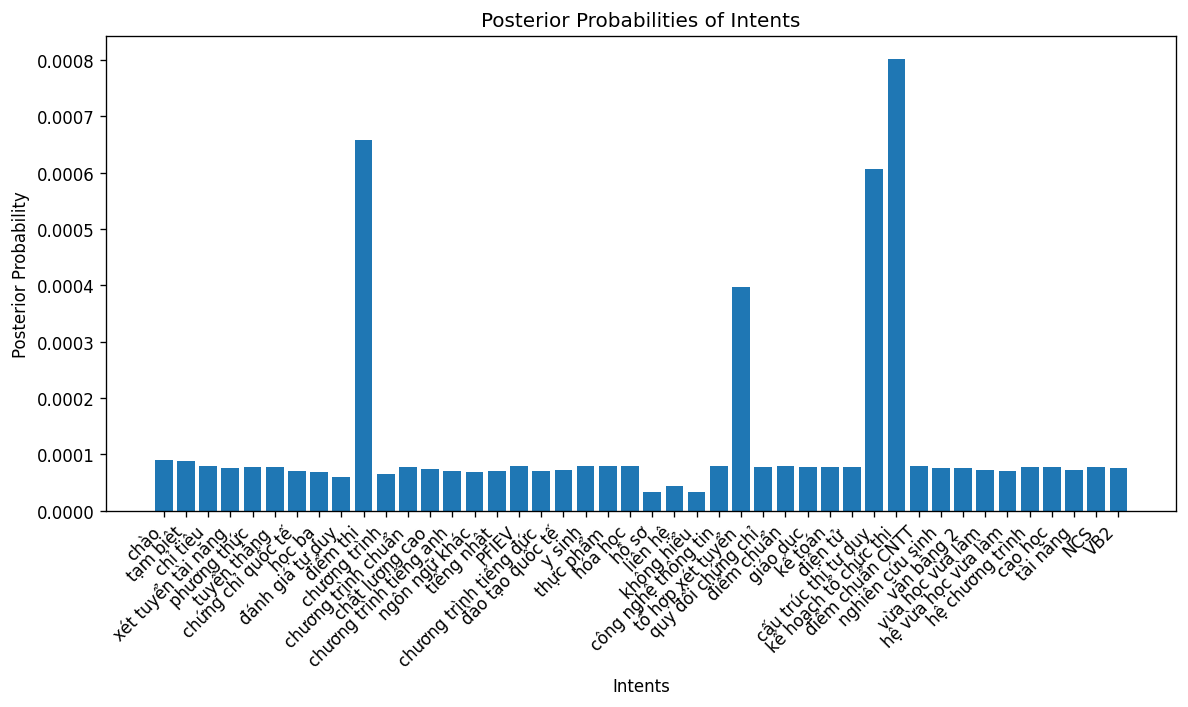


Nhập văn bản (hoặc nhập 'exit' để thoát): diem thi nhu the nao
Văn bản được phân loại vào lớp tag: kế hoạch tổ chức thi
44
Bot tuyển sinh: (5) Các khối ngành có thể sử dụng kết quả Kỳ thi đánh giá tư duy để xét tuyển đại học năm 2023:



<Figure size 640x480 with 0 Axes>

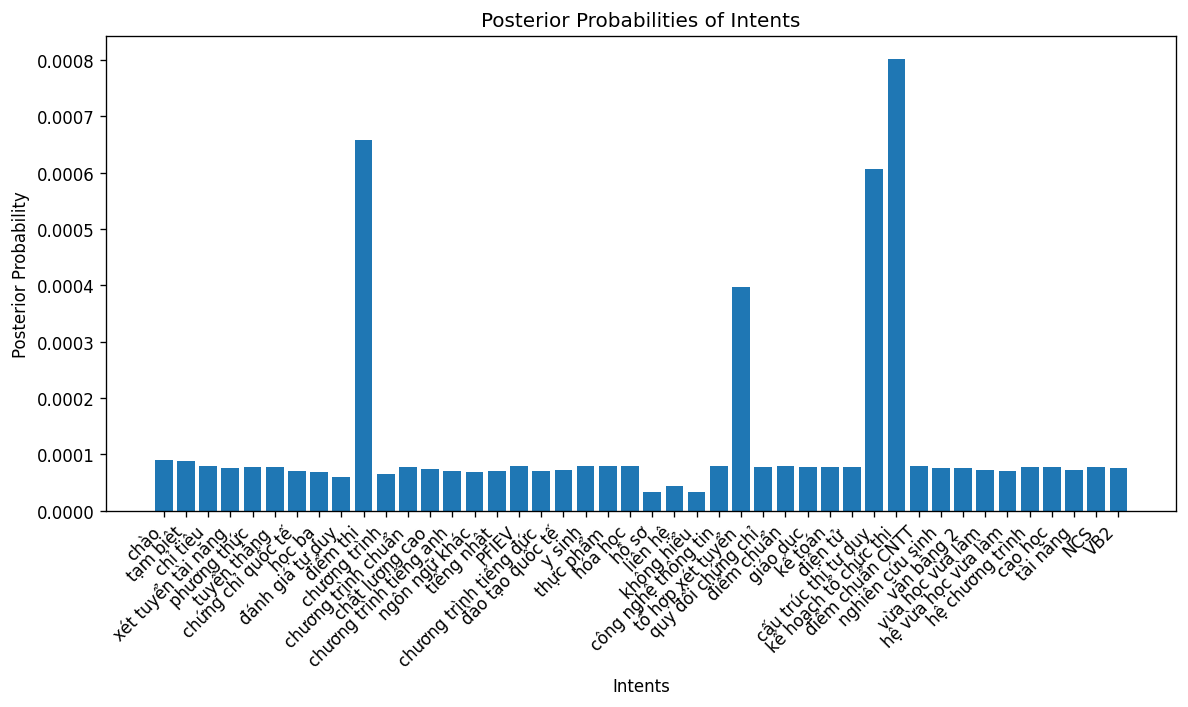


Nhập văn bản (hoặc nhập 'exit' để thoát): chi tieu tuyen sinh
Văn bản được phân loại vào lớp tag: y sinh
44
Bot tuyển sinh: Chương trình tiên tiến Kỹ thuật Y Sinh được xây dựng dựa trên chương trình gốc của đại học Wisconsin-Madison, bang Wisconsin . Đại học Wisconsin-Madison là một trong những trường công lập lâu đời nhất và được xếp hạng 3 trong số các trường công lập trên toàn nước Mỹ về nghiên cứu khoa học.
 Các sinh viên sau khi tốt nghiệp ra trường có khả năng
 - Áp dụng các kiến thức toán học, khoa học và kỹ thuật để giải quyết các vấn đề chung giữa kỹ thuật và y sinh. Có khả năng thích ứng tốt với công việc vận hành/đánh giá các giải pháp, hệ thống/quá trình/sản phẩm kỹ thuật trong thực tế; và có khả năng tự học, tự cập nhật kiến thức để đáp ứng yêu cầu công việc thực tế.
 - Có kiến thức về quản trị và quản lý, có năng lực tư duy một cách hệ thống, phẩm chất cá nhân và kỹ năng làm việc chuyên nghiệp cần thiết, và năng lực ngoại ngữ cần thiết để thích ứng với môi trường làm việ

<Figure size 640x480 with 0 Axes>

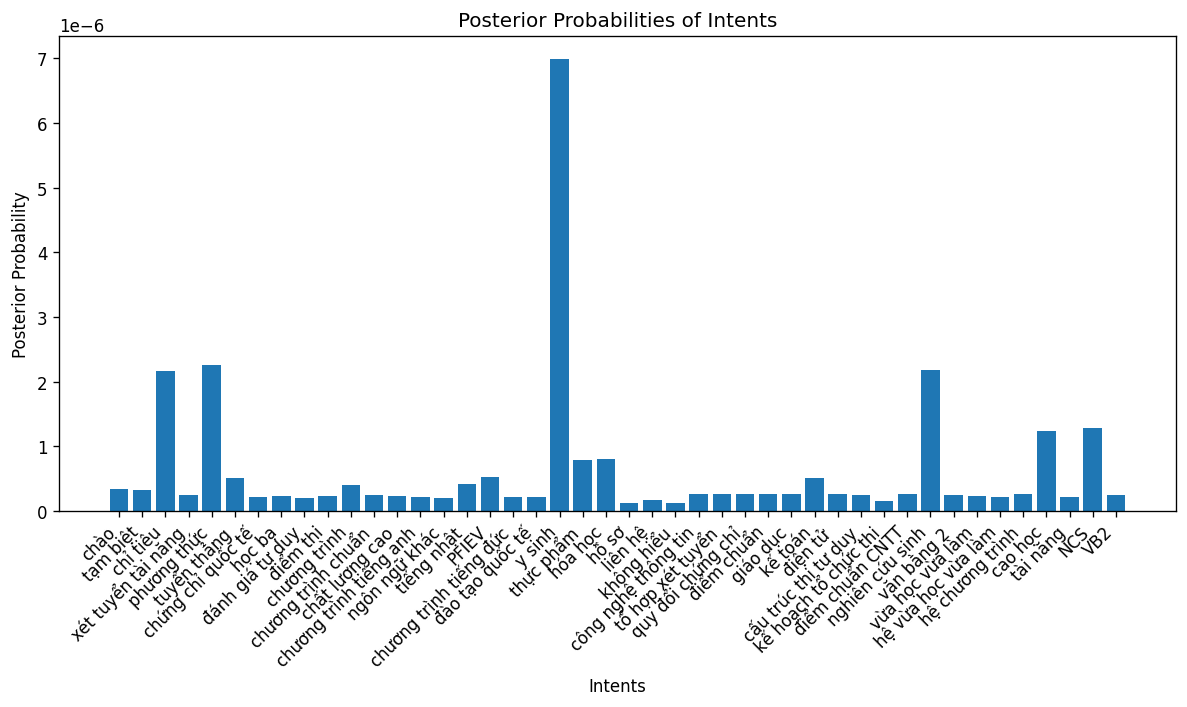


Nhập văn bản (hoặc nhập 'exit' để thoát): chi tieu
Văn bản được phân loại vào lớp tag: hóa học
44
Bot tuyển sinh: Kỹ thuật Hóa học, Hóa học, Kỹ thuật Hóa dược



<Figure size 640x480 with 0 Axes>

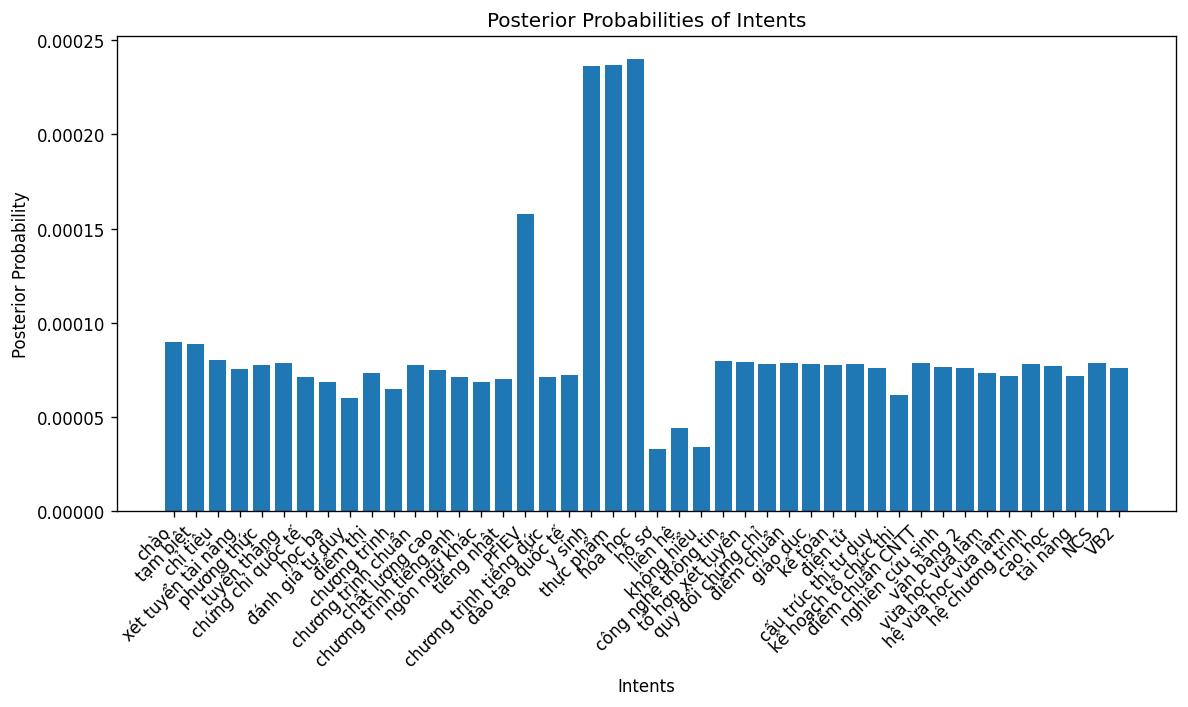


Nhập văn bản (hoặc nhập 'exit' để thoát): chỉ tiêu
Văn bản được phân loại vào lớp tag: chỉ tiêu
44
Bot tuyển sinh: Tổng chỉ tiêu tuyển sinh dự kiến là 7,985 sinh viên.



<Figure size 640x480 with 0 Axes>

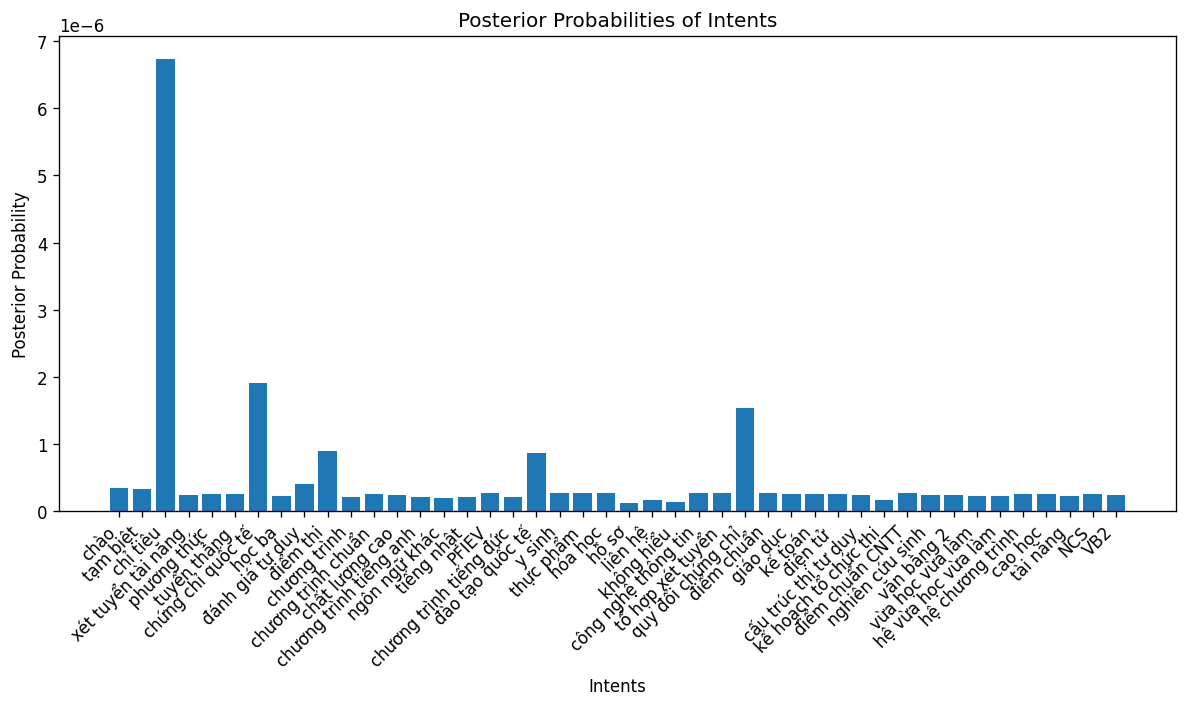


Nhập văn bản (hoặc nhập 'exit' để thoát): xét tuyển thẳng
Văn bản được phân loại vào lớp tag: tuyển thẳng
44
Bot tuyển sinh: Đối tượng xét tuyển: 
 -Thí sinh tốt nghiệp THPT năm 2023, đạt thành tích cao trong kỳ thi học sinh giỏi (HSG), cuộc thi Khoa học kỹ thuật (KHKT) do Bộ Giáo dục và Đào tạo tổ chức, cụ thể như sau:
 i) Thí sinh được triệu tập tham dự kỳ thi chọn đội tuyển quốc gia dự thi Olympic Quốc tế hoặc đoạt giải Nhất, Nhì, Ba trong kỳ thi chọn HSG Quốc gia được xét tuyển thẳng vào các ngành học phù hợp với môn đạt giải.
 ii) Thí sinh trong đội tuyển Quốc gia tham dự cuộc thi KHKT Quốc tế hoặc đoạt giải Nhất, Nhì, Ba trong cuộc thi KHKT cấp Quốc gia do Bộ GD&ĐT tổ chức được xét tuyển thẳng vào ngành học phù hợp với lĩnh vực đề tài dự thi.
 Để hiểu chi tiết hơn hãy xem <a href="https://www.hust.edu.vn/uploads/sys/tuyen-sinh/2023_05/qui-dinh-ve-xttn-nam-2023_final-2-1.pdf">TẠI ĐÂY</a>.



<Figure size 640x480 with 0 Axes>

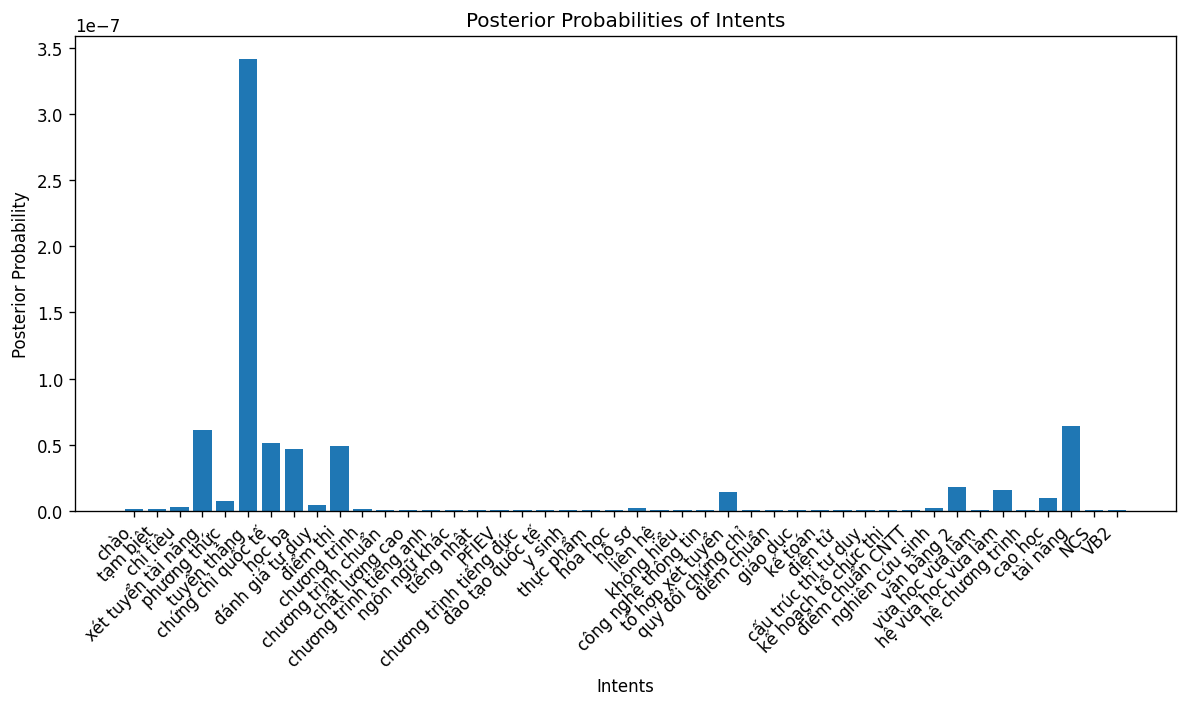


Nhập văn bản (hoặc nhập 'exit' để thoát): chào bạn
Văn bản được phân loại vào lớp tag: chào
44
Bot tuyển sinh: Xin chào! Bạn có thắc mắc gì về thông tin tuyển sinh?



<Figure size 640x480 with 0 Axes>

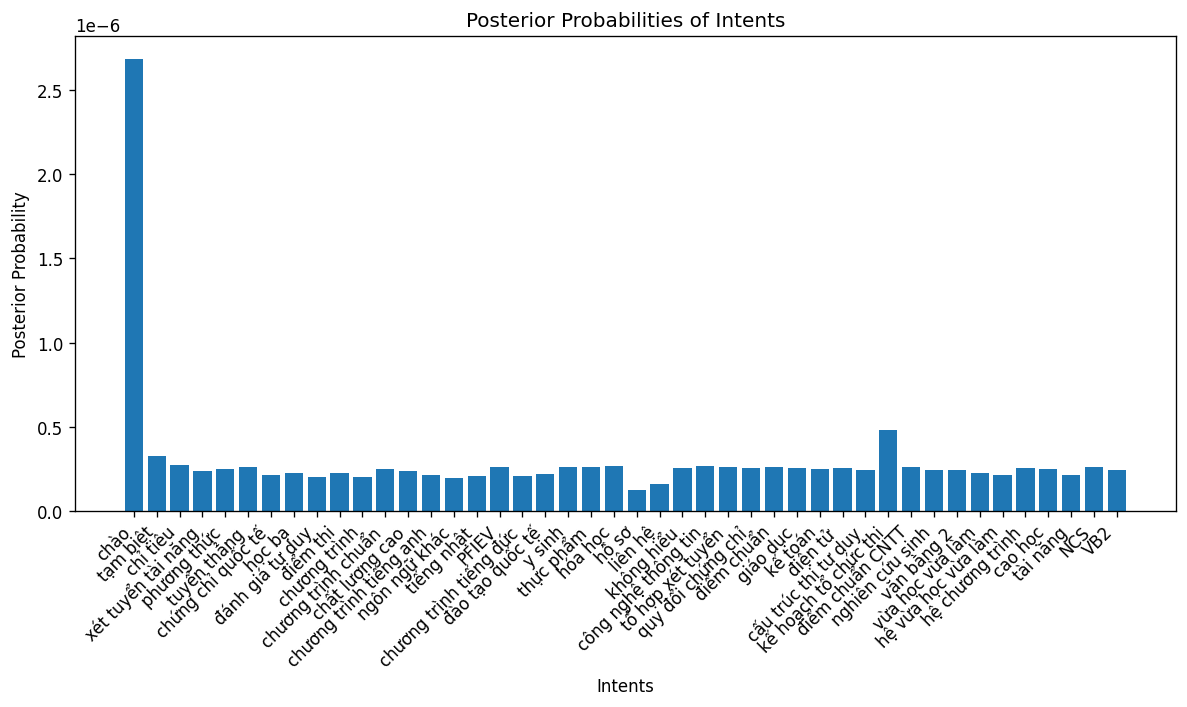


Nhập văn bản (hoặc nhập 'exit' để thoát): kinh tế
Văn bản được phân loại vào lớp tag: đào tạo quốc tế
44
Bot tuyển sinh: STT.Ngành đào tạo	Chỉ tiêu	Mã xét tuyển
 1.Quản trị Kinh doanh - ĐH Troy (Hoa Kỳ) (do ĐH Troy cấp bằng)	80	TROY-BA
 2.Khoa học Máy tính - ĐH Troy (Hoa Kỳ) (do ĐH Troy cấp bằng)	80	TROY-IT
 3.Tiếng Anh chuyên nghiệp quốc tế (do ĐHBK Hà Nội và ĐH Plymouth Marjon-Vương quốc Anh cấp bằng)	90	FL2(1)
 Ghi chú:
 (1) – Chương trình không xét tuyển theo phương thức điểm thi đánh giá tư duy.
 (2) – Chương trình không xét tuyển theo phương thức điểm thi tốt nghiệp THPT.
 - Mã xét tuyển theo từng phương thức tuyển sinh sẽ được thông tin cụ thể trong Đề án tuyển sinh 2023 của ĐHBK Hà Nội.



<Figure size 640x480 with 0 Axes>

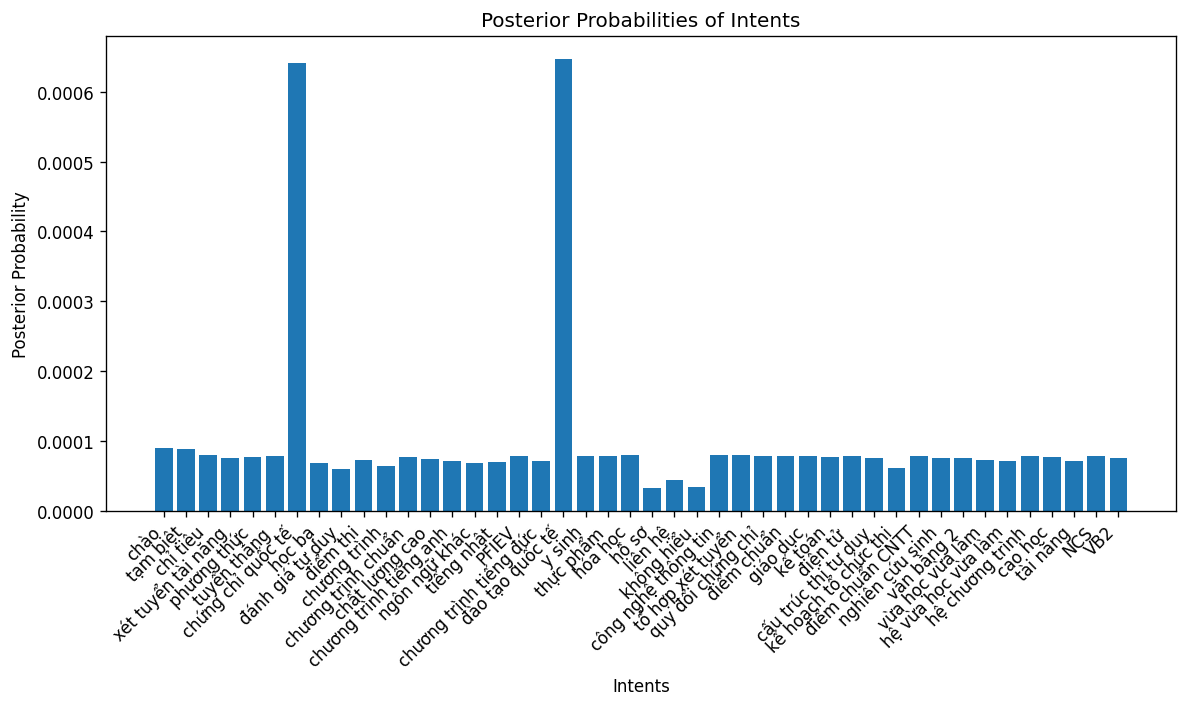


Nhập văn bản (hoặc nhập 'exit' để thoát): xét tuyển tài năng
Văn bản được phân loại vào lớp tag: tài năng
44
Bot tuyển sinh:  Từ 30/3: Mở đăng ký diện 1.1 
 Từ 30/3 đến 15/5: Mở đăng ký diện 1.2 và 1.3 
 Từ 30/5 đến 20/6: Phỏng vấn thí sinh diện 1.3 
 Ngày 30/6: Công bố kết quả xét tuyển tài năng



<Figure size 640x480 with 0 Axes>

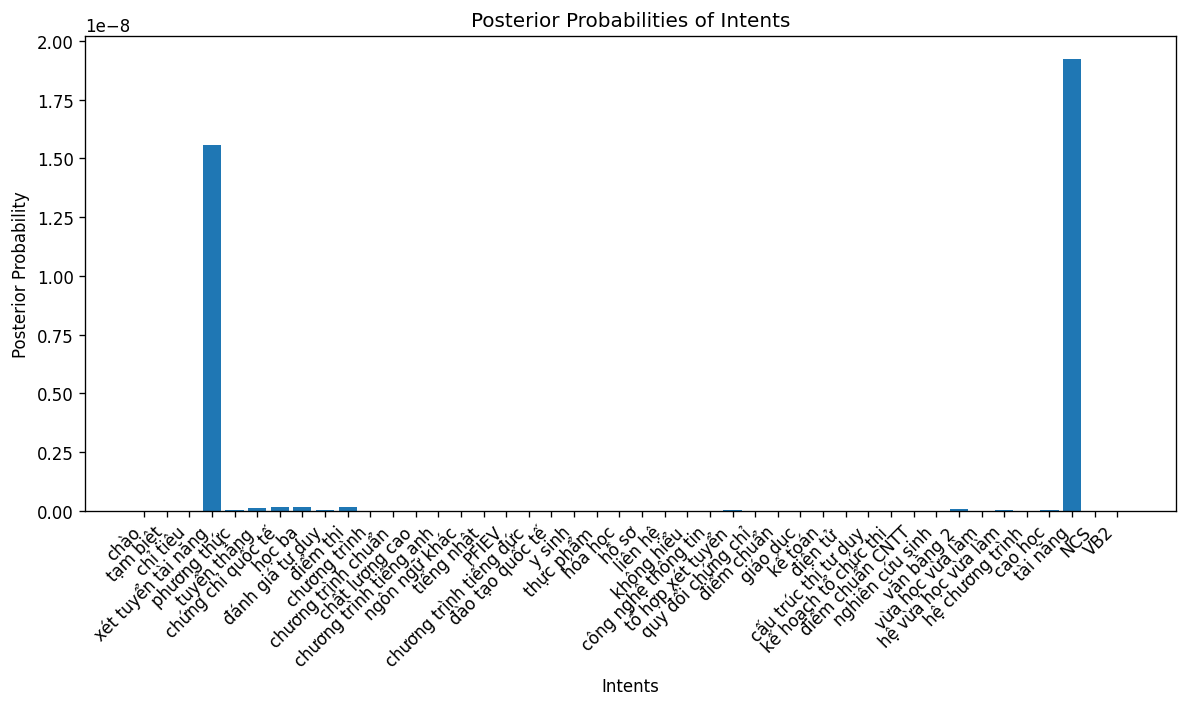


Nhập văn bản (hoặc nhập 'exit' để thoát): điểm chuẩn ngành công nghệ thông tin
Văn bản được phân loại vào lớp tag: điểm chuẩn CNTT
44
Bot tuyển sinh: Khoa học máy tính - hợp tác với đại học Troy (Hoa Kỳ): Với chỉ tiêu tuyển sinh 80 sinh viên - điểm chuẩn dựa trên điểm thi THPTQG: 25/15 điểm.



<Figure size 640x480 with 0 Axes>

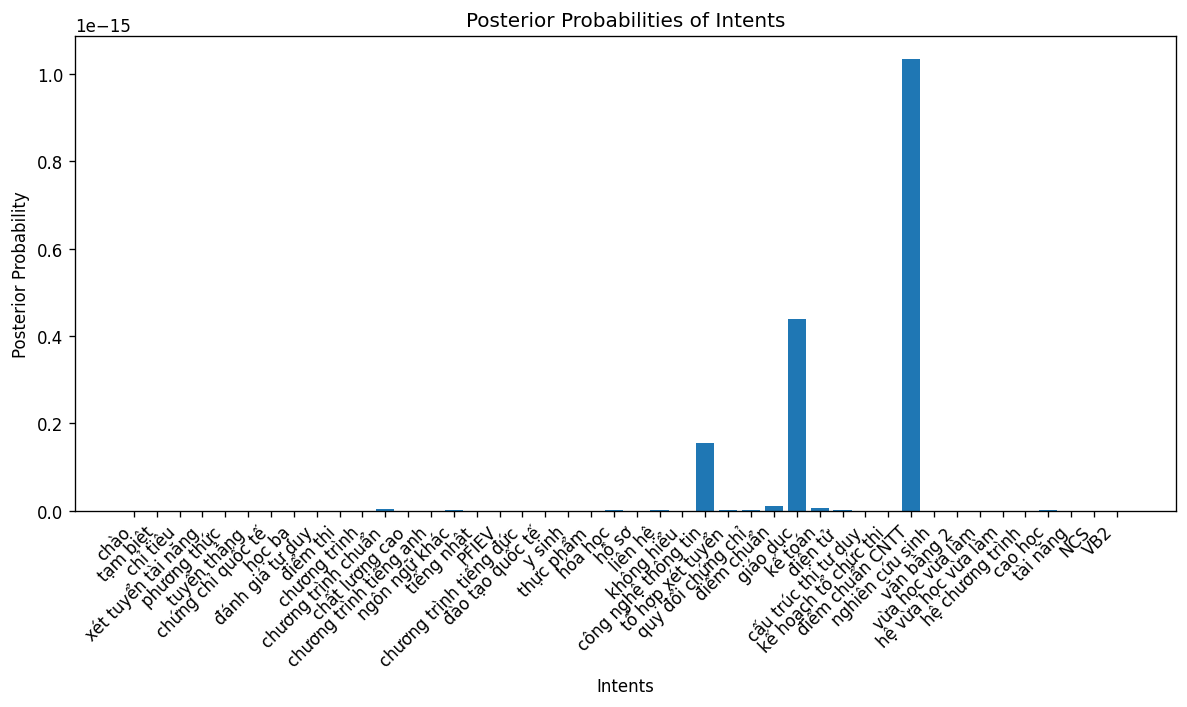

In [ ]:
previous_probabilities = {}
while True:
  document = input("\nNhập văn bản (hoặc nhập 'exit' để thoát): ")
  if document.lower() == "exit":
    break

  result, probability = classify_text(document)
  print(f"Văn bản được phân loại vào lớp tag: {result}")
  # Tìm dữ liệu cho tag đã phân loại
  for intent in data['intents']:
    if intent['tag'] == result:
      responses = intent['responses']
      duplicate_pair_found = False
      previous_tags = list(probability.keys())
      num_tags = len(previous_tags)
      print(num_tags)

      for i in range(num_tags):
        for j in range(i + 1, num_tags):
          tag1 = previous_tags[i]
          tag2 = previous_tags[j]

          probability1 = probability[tag1]
          probability2 = probability[tag2]
          if abs(probability1 - probability2) < 1e-6 and probability1>0.01 and probability2>0.01:
            duplicate_pair_found = True
                    # print(probability1)  # In ra xác suất hậu nghiệm của cặp tag bằng nhau
            break
          if duplicate_pair_found:
            break

      if duplicate_pair_found:
        print("Bot không hiểu! Bạn hãy hỏi chi tiết hơn được không ?")
        continue  # Yêu cầu người dùng nhập lại

      response = random.choice(responses)
      print("Bot tuyển sinh: " + response+ "\n")
      plot_classification_results(result, probability)





Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
